# Introduction

In this notebook, we will do a comprehensive analysis on wether or not you made it out of titanic.

# About the Dataset of Titanic

[You can find the dataset here!](https://www.kaggle.com/datasets/brendan45774/test-file/code)


# TITANIC SURVIVAL PREDICTION

<img src='https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg'>

# Notebook Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Loading The Data

In [3]:
data = pd.read_csv('/content/tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


# Data Cleaning & Preprocessing

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Removing unwanted columns

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

data.drop(columns=columns_to_drop, inplace=True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50,0,0,7.83,Q
1,1,3,female,47.00,1,0,7.00,S
2,0,2,male,62.00,0,0,9.69,Q
3,0,3,male,27.00,0,0,8.66,S
4,1,3,female,22.00,1,1,12.29,S


In [6]:
data.shape

(418, 8)

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,0.36,2.27,30.27,0.45,0.39,35.63
std,0.48,0.84,14.18,0.90,0.98,55.91
min,0.00,1.00,0.17,0.00,0.00,0.00
25%,0.00,1.00,21.00,0.00,0.00,7.90
50%,0.00,3.00,27.00,0.00,0.00,14.45
75%,1.00,3.00,39.00,1.00,0.00,31.50
max,1.00,3.00,76.00,8.00,9.00,512.33


## Data Transformation


## Handling missing values

In [8]:
data.isna().sum()


Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [9]:
# To remove the nan values

data.dropna(inplace=True)


In [10]:
# # Filling in NaN ages with median value
# median_age = data.Age.median()
# data.Age.fillna(median_age, inplace=True)

In [11]:
# Data Transformation for Emabarked and Sex Columns

data = pd.get_dummies(data, columns=['Embarked', 'Sex'], drop_first=True)



In [12]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

# Visualising The Data

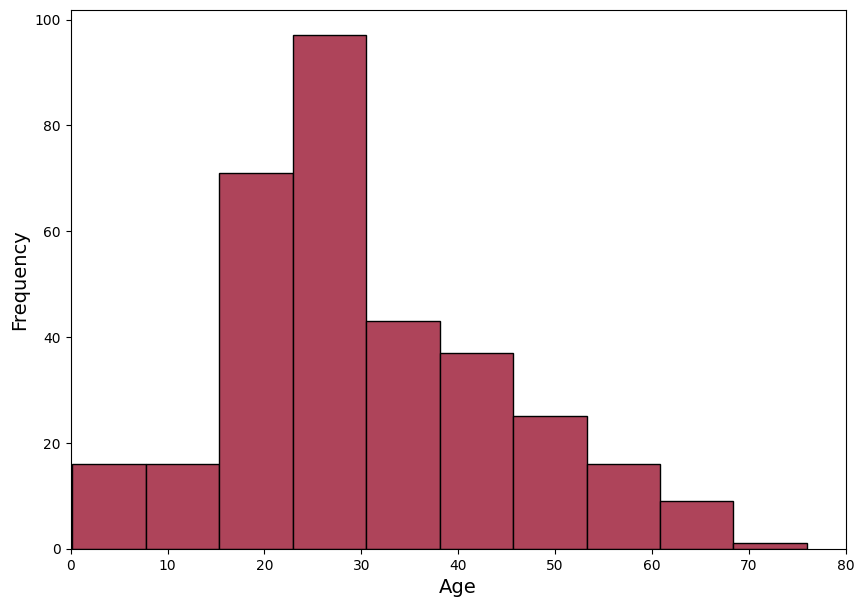

In [13]:
plt.figure(figsize=(10,7))
plt.hist(data.Age,ec='Black', color='#AE445A')
plt.xlim(0, 80)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

<ipython-input-14-d110821a2eab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age,color='#419197')


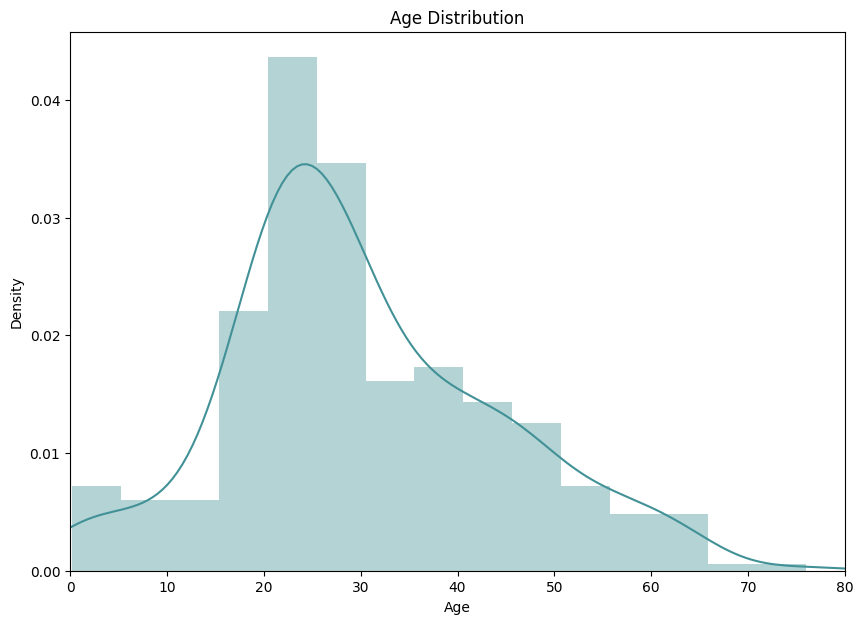

In [14]:
plt.figure(figsize=(10,7))
sns.distplot(data.Age,color='#419197')
plt.xlim(0,80)
plt.title('Age Distribution')
plt.show()

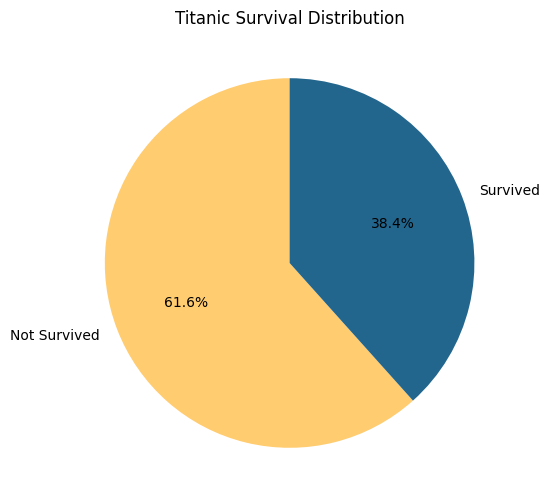

In [15]:
survival_count = data.Survived.value_counts()
plt.figure(figsize=(6,6))
colors = ['#FFCC70', '#22668D']
plt.pie(survival_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Titanic Survival Distribution')
plt.show()

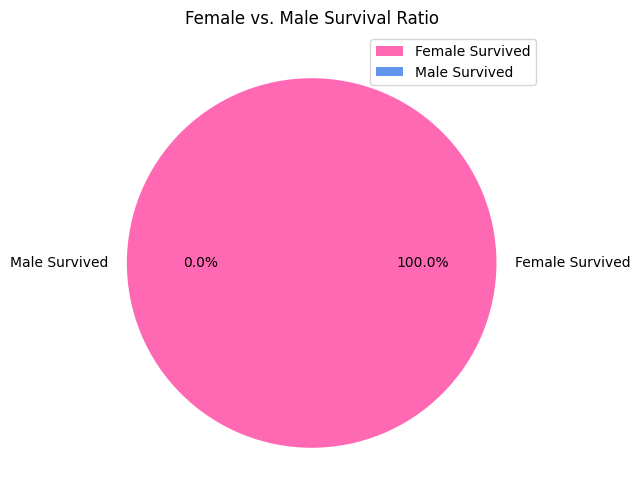

In [16]:
female_survived = data['Survived'][data.Sex_male == 0].sum()
male_survived = data['Survived'][data.Sex_male == 1].sum()

# Creating a pie chart
labels = ['Female Survived', 'Male Survived']
sizes = [female_survived, male_survived]
colors = ['#FF69B4', '#6495ED']  # Pink for female, Blue for male
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title('Female vs. Male Survival Ratio')
plt.legend()
plt.show()

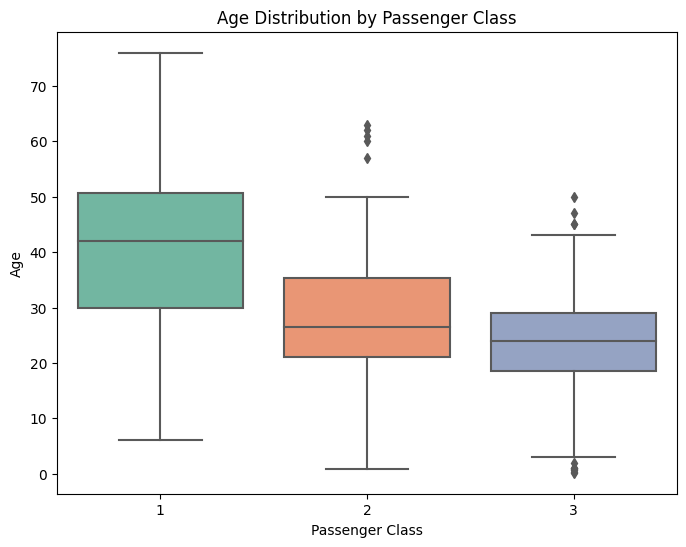

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=data, palette='Set2')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class')
plt.show()

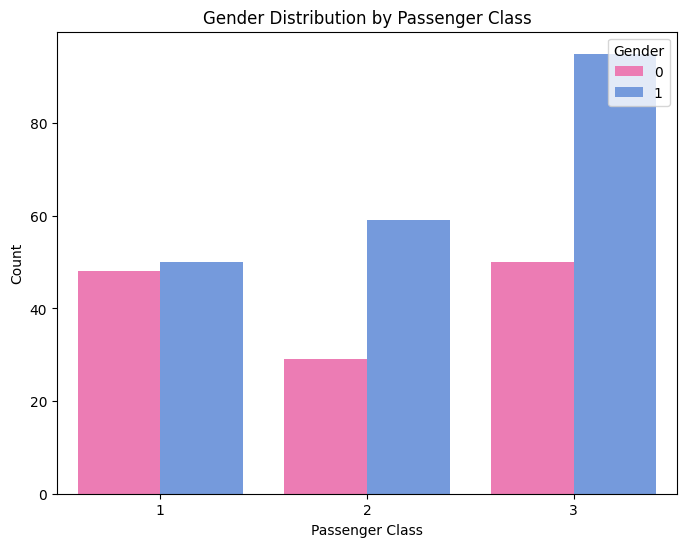

In [18]:
from seaborn.rcmod import palettes
plt.figure(figsize=(8, 6))
colors = ['#FF69B4', '#6495ED']
sns.countplot(x='Pclass', hue='Sex_male', data=data, palette=colors)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Gender Distribution by Passenger Class')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Descriptive Statistics


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    331 non-null    int64  
 1   Pclass      331 non-null    int64  
 2   Age         331 non-null    float64
 3   SibSp       331 non-null    int64  
 4   Parch       331 non-null    int64  
 5   Fare        331 non-null    float64
 6   Embarked_Q  331 non-null    uint8  
 7   Embarked_S  331 non-null    uint8  
 8   Sex_male    331 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 19.1 KB


## Correlation

### $$ \rho _{xY} = corr(X,Y) $$
### $$ -1.0 \leq \rho _{XY} \leq + 1.0$$

In [20]:
data.Survived.corr(data.Age)

0.005103526993175358

In [21]:
data.Survived.corr(data.Fare)

0.1926724606305124

In [22]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
Survived,1.00,-0.12,0.01,0.08,0.16,0.19,0.09,-0.12,-1.00
Pclass,-0.12,1.00,-0.50,0.00,-0.00,-0.59,0.20,0.25,0.12
Age,0.01,-0.50,1.00,-0.09,-0.06,0.34,-0.02,-0.16,-0.01
SibSp,0.08,0.00,-0.09,1.00,0.35,0.15,-0.08,0.08,-0.08
Parch,0.16,-0.00,-0.06,0.35,1.00,0.25,-0.12,0.04,-0.16
Fare,0.19,-0.59,0.34,0.15,0.25,1.00,-0.12,-0.27,-0.19
Embarked_Q,0.09,0.20,-0.02,-0.08,-0.12,-0.12,1.00,-0.39,-0.09
Embarked_S,-0.12,0.25,-0.16,0.08,0.04,-0.27,-0.39,1.00,0.12
Sex_male,-1.00,0.12,-0.01,-0.08,-0.16,-0.19,-0.09,0.12,1.00


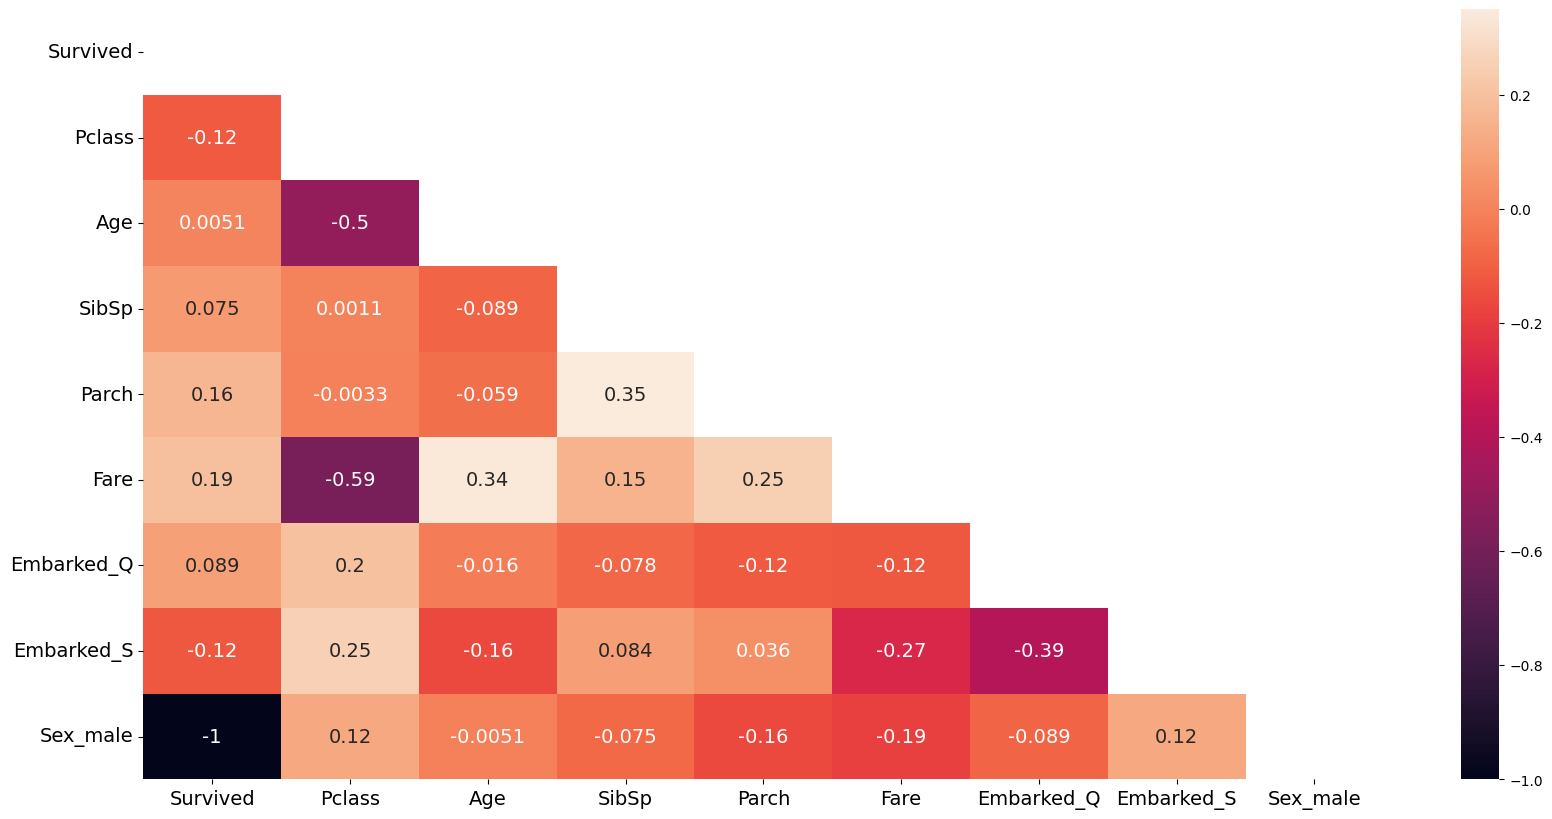

In [23]:
data.Survived.corr(data.Age)
data.Survived.corr(data.Fare)
data.corr()
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

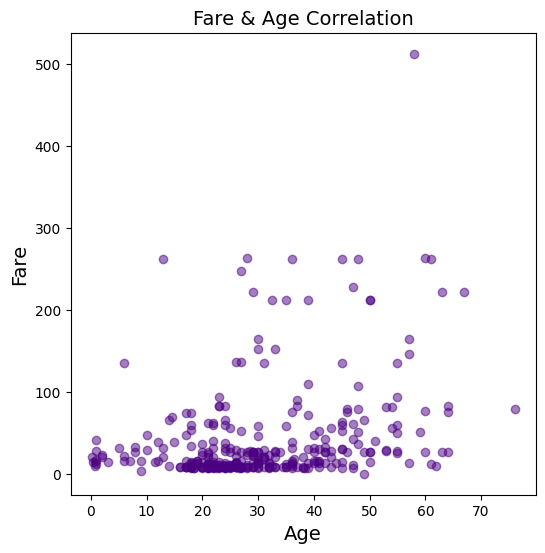

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(data.Age, data.Fare, alpha=0.5, color='indigo')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.title(f'Fare & Age Correlation', fontsize=14)
plt.show()

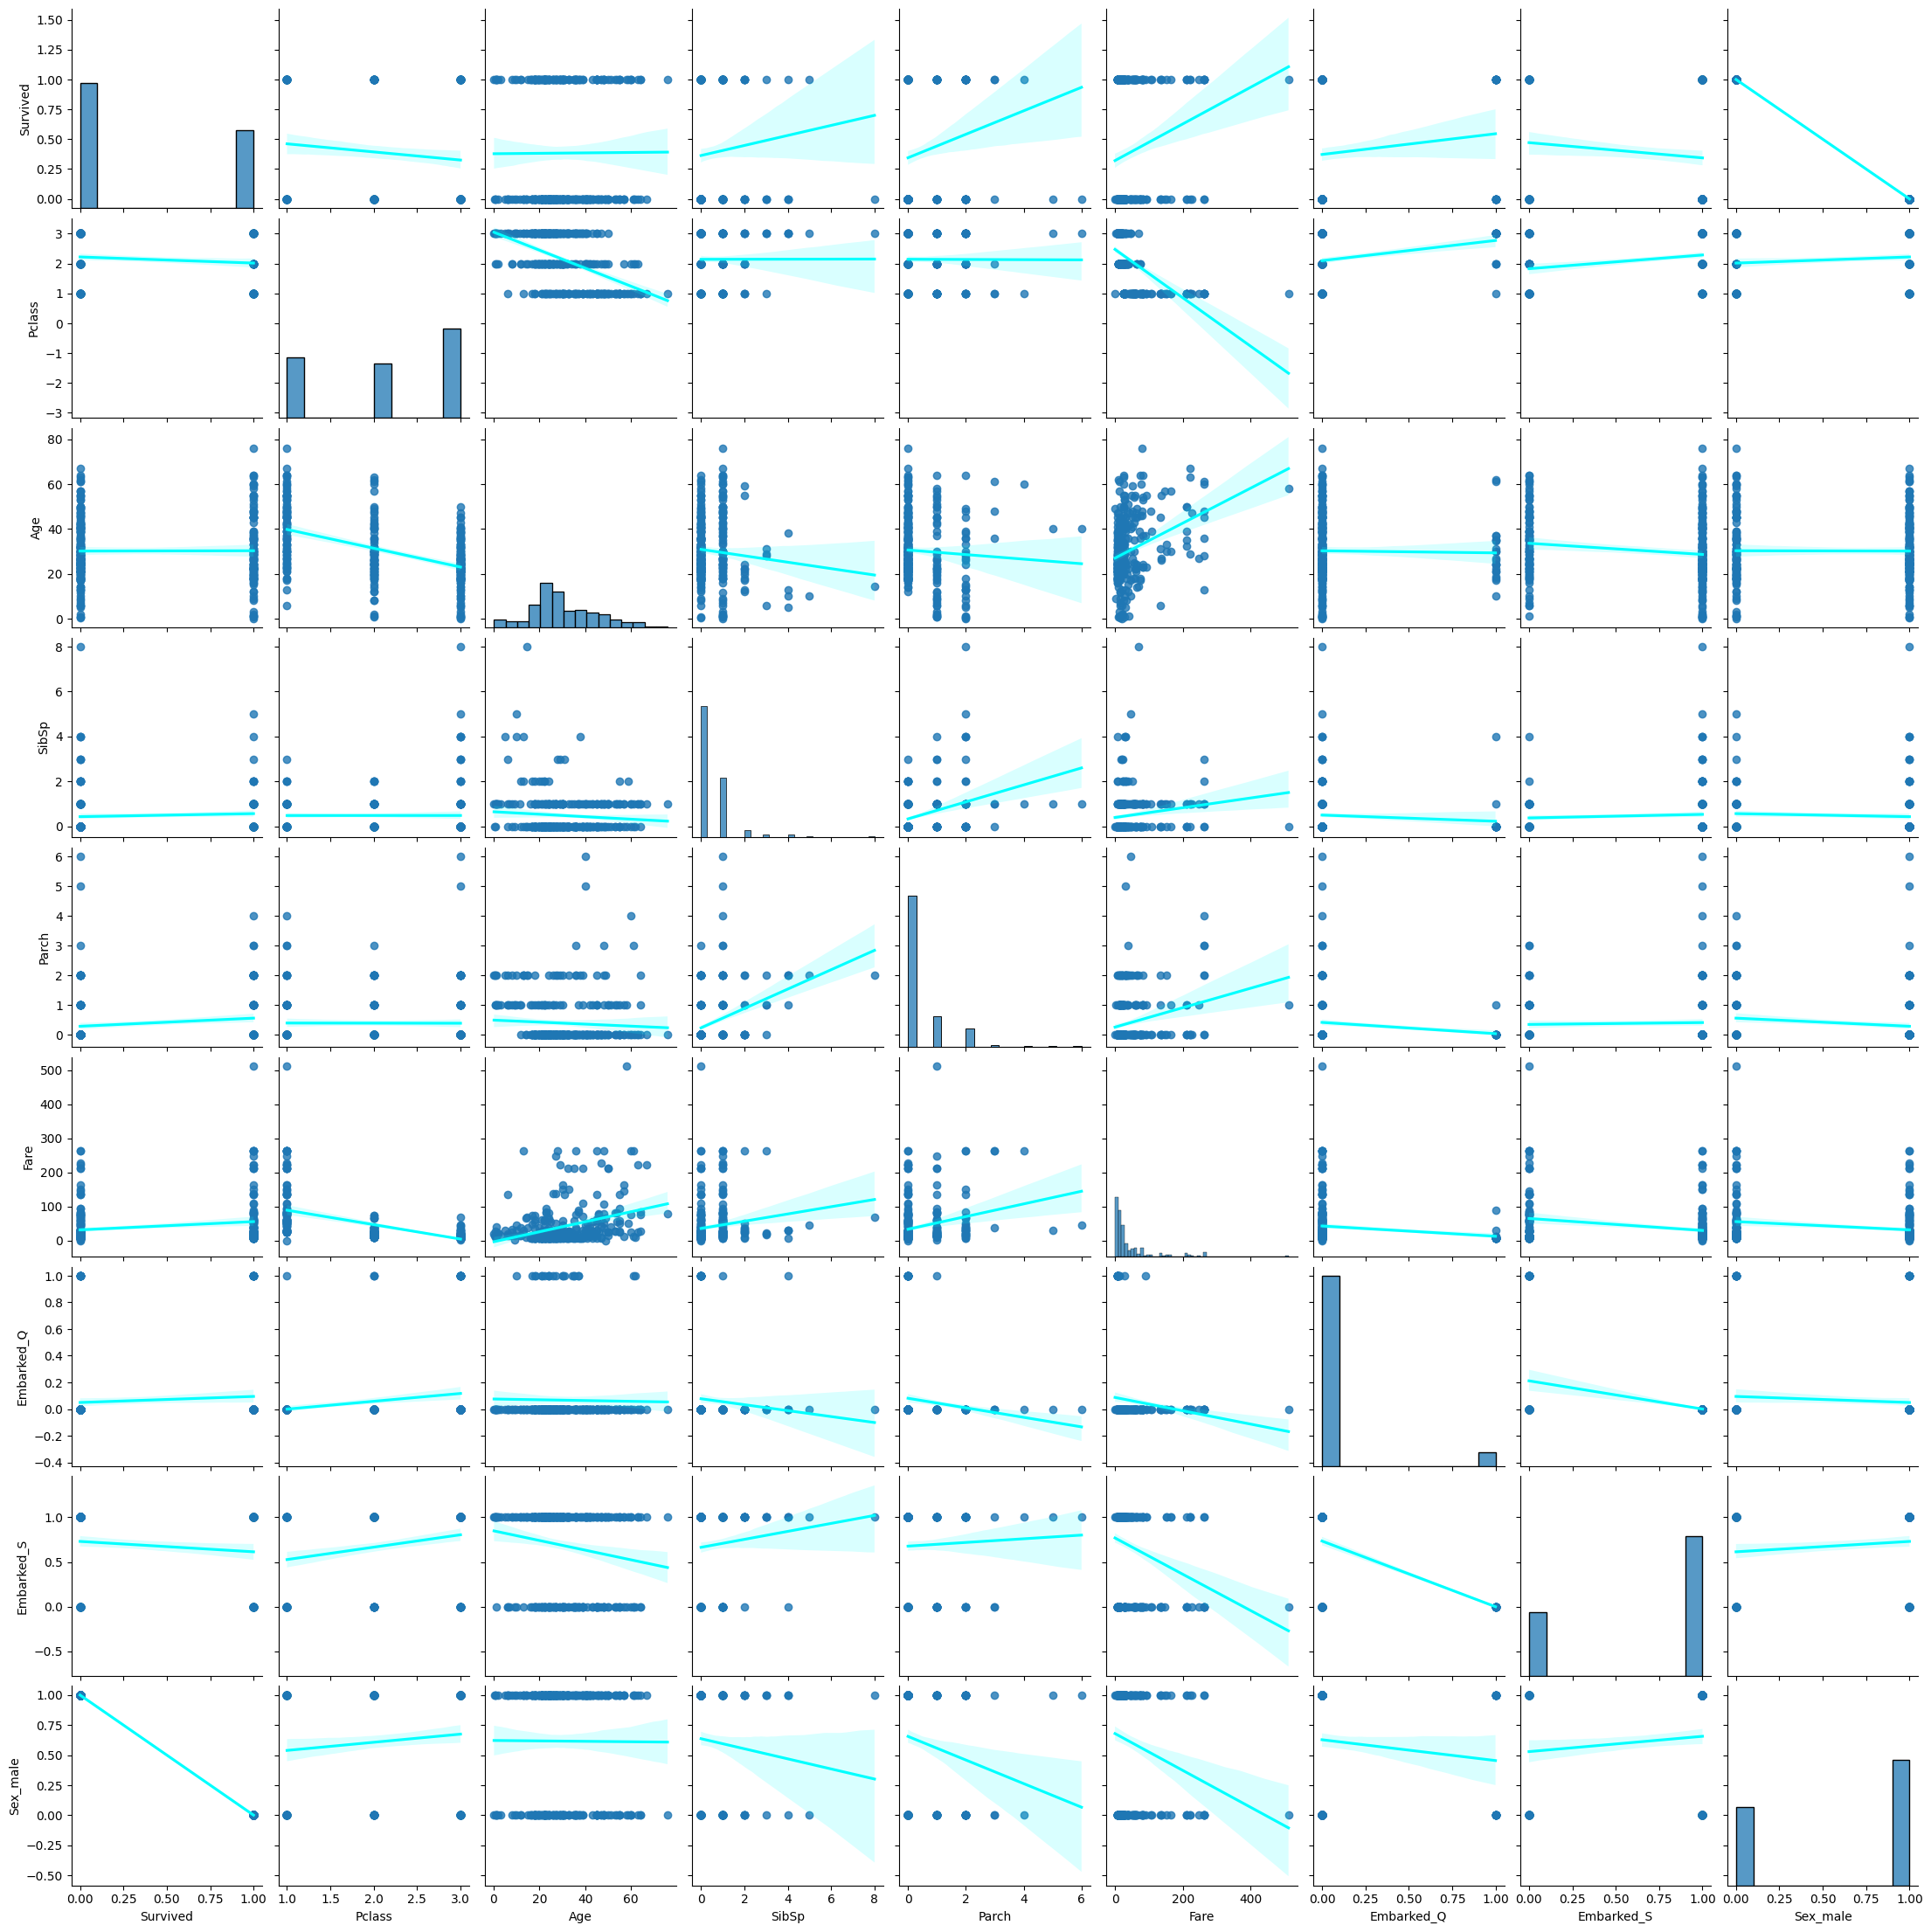

CPU times: user 35.5 s, sys: 408 ms, total: 35.9 s
Wall time: 49.3 s


In [25]:
%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training the Model

In [26]:
features = data.drop(columns = 'Survived')

X_train, X_test, y_train, y_test = train_test_split(features, data.Survived, test_size=0.2)



In [27]:
regr = LogisticRegression()
regr.fit(X_train, y_train)
print('Intercept', regr.intercept_[0])
print('Training R-squared values: ', regr.score(X_train, y_train))
print('Testing R-squared values: ', regr.score(X_test, y_test))

Intercept 1.1031701299763927
Training R-squared values:  1.0
Testing R-squared values:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Evalutation

In [28]:
# Predictions on the test data
y_pred = regr.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[38  0]
 [ 0 29]]


In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0


In [30]:
def predict_survival(model, passenger_info):
    try:

        # Create a DataFrame from the inputs
        passenger_data = pd.DataFrame([passenger_info])

        # Make predictions using the model
        prediction = model.predict(passenger_data)

        if prediction[0] == 1:
            return "Congratulations! Based on the stats provided, You survived the TITANIC!  ."
        else:
            return "Unfortunately, Based on the stats provided.... You didnt make it.... "

    except Exception as e:
        return "An error occurred while making the prediction: " + str(e)




In [31]:
passenger_info = {
    'Pclass': 3,
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.83,
    'Embarked_Q': 1,
    'Embarked_S': 0,
    'Sex_male': 1

}

prediction_result = predict_survival(regr, passenger_info)
print(prediction_result)

Unfortunately, Based on the stats provided.... You didnt make it.... 
